<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [9]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [10]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2024-12-11 02:35:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  37.7MB/s    in 3.9s    

2024-12-11 02:35:49 (38.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [11]:
!pip install pandas matplotlib sqlite3

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [12]:
# Save the DataFrame into a SQLite database
# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


In [13]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


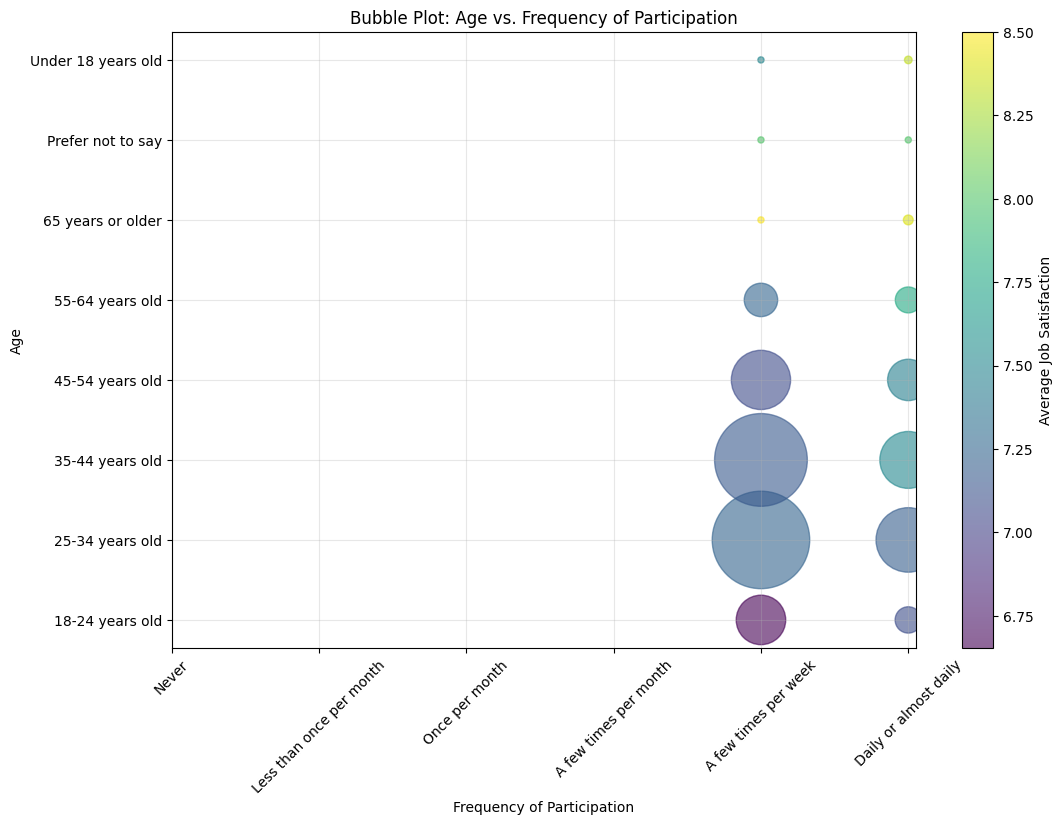

In [25]:
query = """
    SELECT Age, SOPartFreq, JobSat
    FROM main
    WHERE Age IS NOT NULL AND SOPartFreq IS NOT NULL AND JobSat IS NOT NULL
"""
participation_data = pd.read_sql_query(query, conn)
# Map SOPartFreq to numeric values for plotting
freq_mapping = {
    "Never": 0,
    "Less than once per month": 1,
    "Once per month": 2,
    "A few times per month": 3,
    "A few times per week": 4,
    "Daily or almost daily": 5
}
participation_data['FreqNumeric'] = participation_data['SOPartFreq'].map(freq_mapping)

# Calculate the average job satisfaction for size representation
participation_summary = participation_data.groupby(['Age', 'FreqNumeric']).agg(
    AvgJobSat=('JobSat', 'mean'),
    Count=('JobSat', 'size')
).reset_index()
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    participation_summary['FreqNumeric'],  # X-axis: Participation Frequency
    participation_summary['Age'],         # Y-axis: Age
    s=participation_summary['Count'] * 10,  # Bubble size: Count of respondents
    alpha=0.6,                              # Transparency
    c=participation_summary['AvgJobSat'],   # Color: Average Job Satisfaction
    cmap='viridis'                          # Colormap
)
plt.colorbar(scatter, label='Average Job Satisfaction')
plt.xlabel('Frequency of Participation')
plt.ylabel('Age')
plt.title('Bubble Plot: Age vs. Frequency of Participation')
plt.xticks(ticks=range(6), labels=freq_mapping.keys(), rotation=45)
plt.grid(alpha=0.3)
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


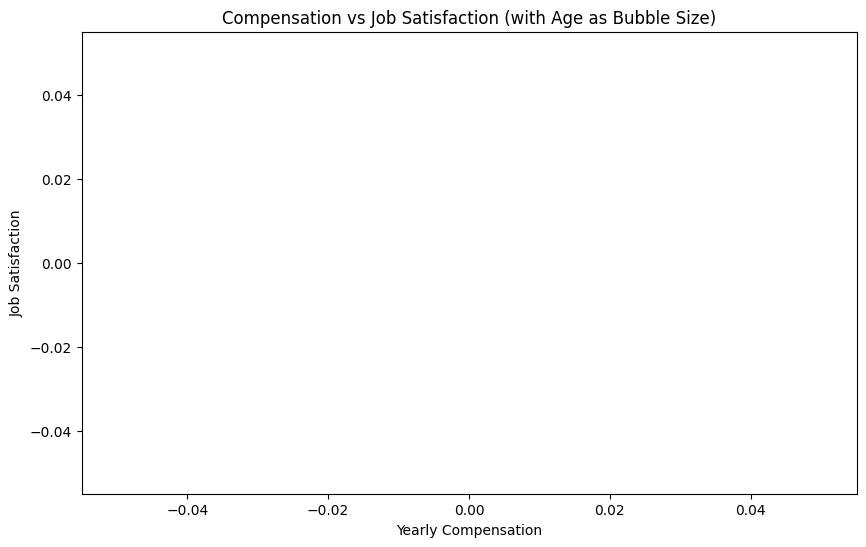

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



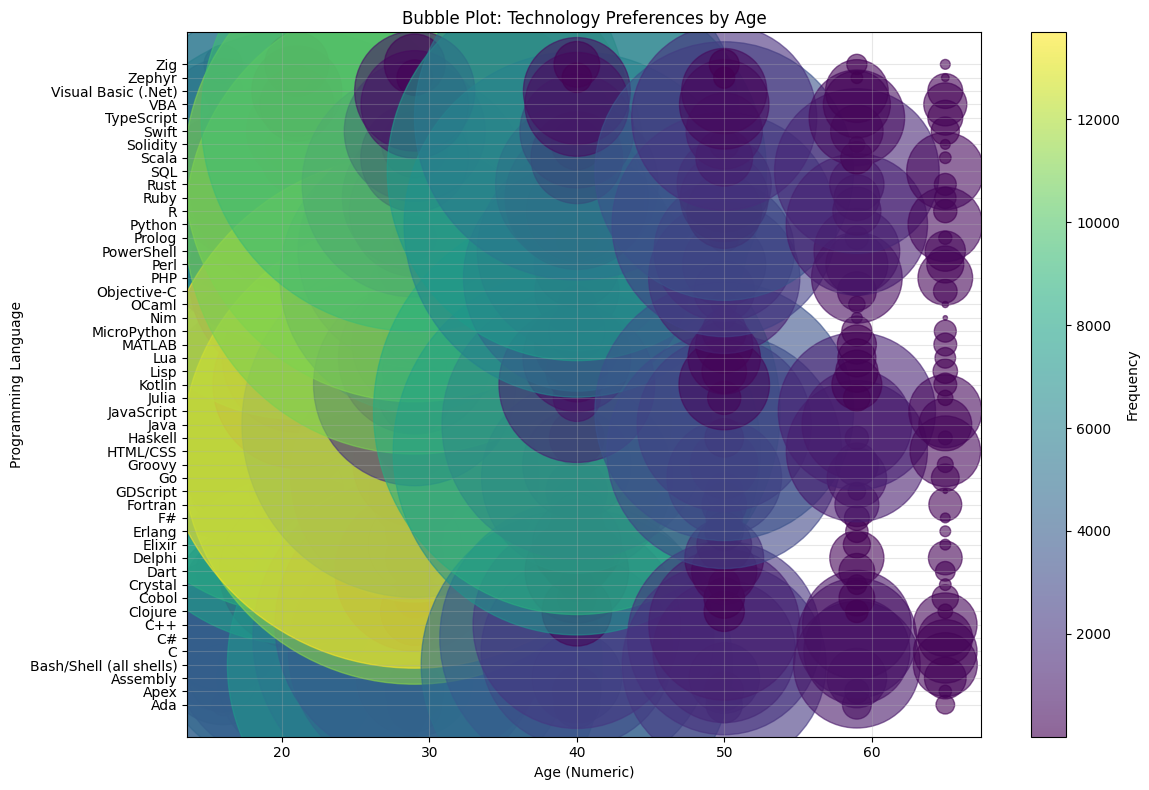

In [19]:
# SQL query to extract necessary columns
query = """
    SELECT Age, LanguageHaveWorkedWith
    FROM main
    WHERE Age IS NOT NULL AND LanguageHaveWorkedWith IS NOT NULL
"""
language_data = pd.read_sql_query(query, conn)

# Map ages to numeric values for plotting
language_data['AgeNumeric'] = language_data['Age'].map(age_mapping)

# Split multiple languages into separate rows and count frequency
language_data_expanded = language_data.assign(
    Language=language_data['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

# Group by Age and Language to count occurrences
language_counts = language_data_expanded.groupby(['AgeNumeric', 'Language']).size().reset_index(name='Frequency')


plt.figure(figsize=(12, 8))

# Create bubble plot
scatter = plt.scatter(
    language_counts['AgeNumeric'],        # X-axis: Age
    language_counts['Language'],          # Y-axis: Languages
    s=language_counts['Frequency'] * 10,  # Bubble size scaled by frequency
    alpha=0.6, 
    c=language_counts['Frequency'],       # Color based on frequency
    cmap='viridis'
)

# Add colorbar, labels, and title
plt.colorbar(scatter, label='Frequency')
plt.xlabel('Age (Numeric)')
plt.ylabel('Programming Language')
plt.title('Bubble Plot: Technology Preferences by Age')
plt.grid(alpha=0.3)

# Display plot
plt.tight_layout()
plt.show()



#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


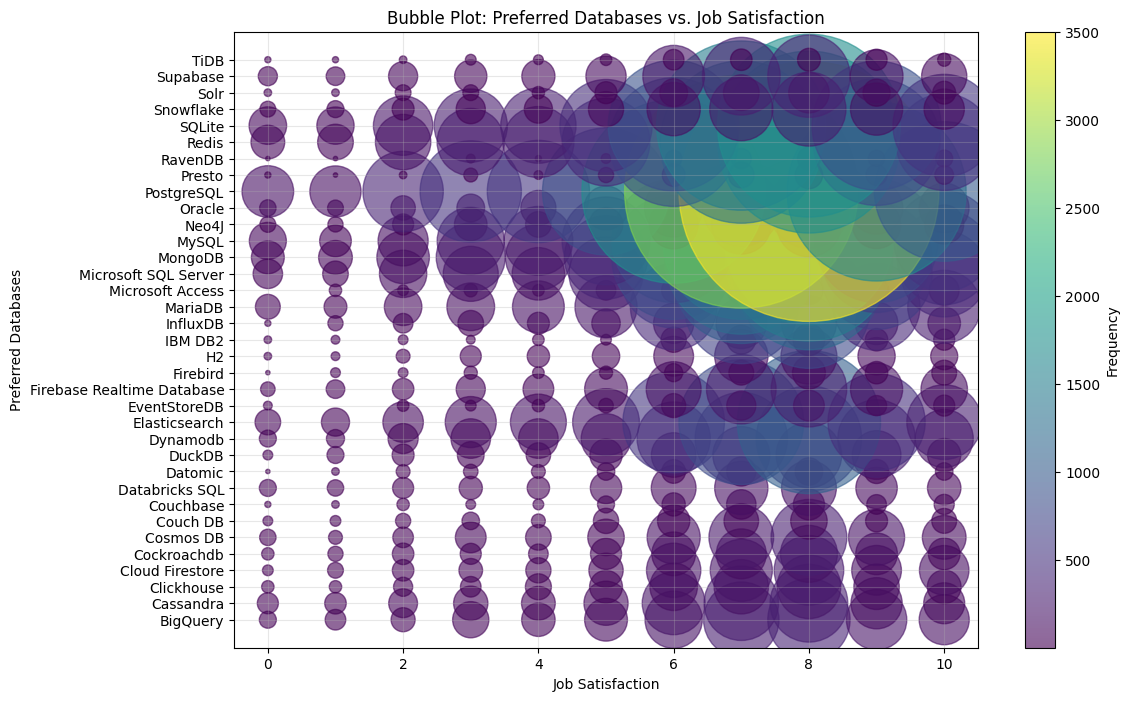

In [20]:
query = """
    SELECT DatabaseWantToWorkWith, JobSat
    FROM main
    WHERE DatabaseWantToWorkWith IS NOT NULL AND JobSat IS NOT NULL
"""
db_data = pd.read_sql_query(query, conn)

# Expand databases into separate rows and count occurrences
db_data_expanded = db_data.assign(Database=db_data['DatabaseWantToWorkWith'].str.split(';')).explode('Database')

# Group by Database and JobSat to calculate respondent counts
db_counts = db_data_expanded.groupby(['Database', 'JobSat']).size().reset_index(name='Frequency')
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    db_counts['JobSat'], 
    db_counts['Database'], 
    s=db_counts['Frequency'] * 10, 
    alpha=0.6, 
    c=db_counts['Frequency'], 
    cmap='viridis'
)
plt.colorbar(scatter, label='Frequency')
plt.xlabel('Job Satisfaction')
plt.ylabel('Preferred Databases')
plt.title('Bubble Plot: Preferred Databases vs. Job Satisfaction')
plt.grid(alpha=0.3)
plt.show()



### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


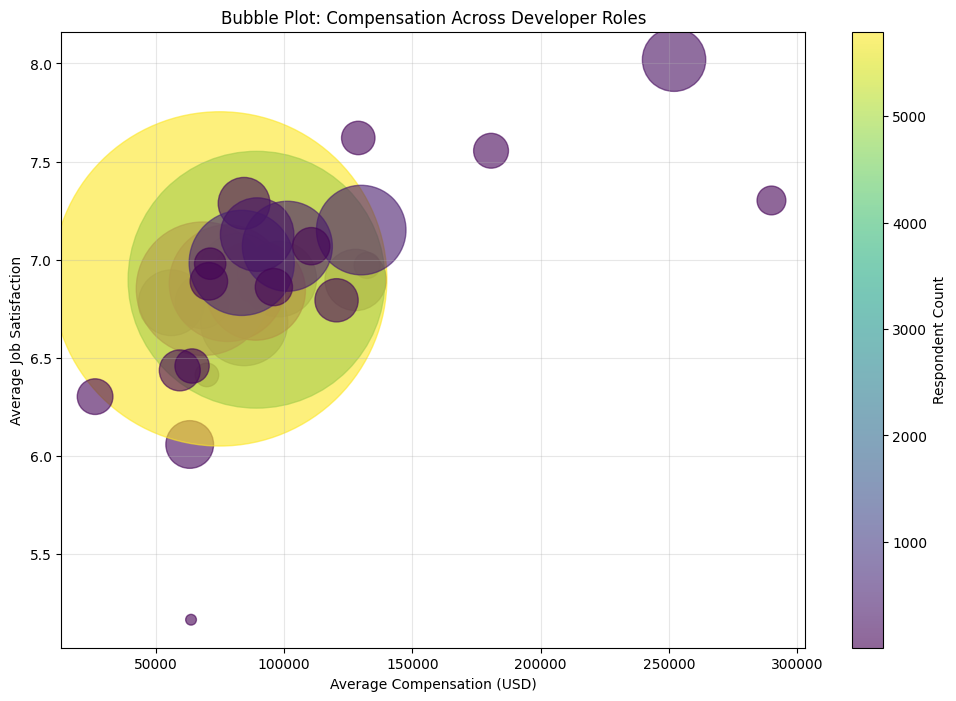

In [21]:
query = """
    SELECT DevType, ConvertedCompYearly, JobSat
    FROM main
    WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL AND JobSat IS NOT NULL
"""
dev_data = pd.read_sql_query(query, conn)
# Expand roles into separate rows
dev_data_expanded = dev_data.assign(DevRole=dev_data['DevType'].str.split(';')).explode('DevRole')

# Group by DevRole to calculate average compensation and job satisfaction
dev_summary = dev_data_expanded.groupby(['DevRole']).agg(
    AvgComp=('ConvertedCompYearly', 'mean'),
    AvgJobSat=('JobSat', 'mean'),
    Count=('JobSat', 'size')
).reset_index()
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    dev_summary['AvgComp'], 
    dev_summary['AvgJobSat'], 
    s=dev_summary['Count'] * 10, 
    alpha=0.6, 
    c=dev_summary['Count'], 
    cmap='viridis'
)
plt.colorbar(scatter, label='Respondent Count')
plt.xlabel('Average Compensation (USD)')
plt.ylabel('Average Job Satisfaction')
plt.title('Bubble Plot: Compensation Across Developer Roles')
plt.grid(alpha=0.3)
plt.show()



#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


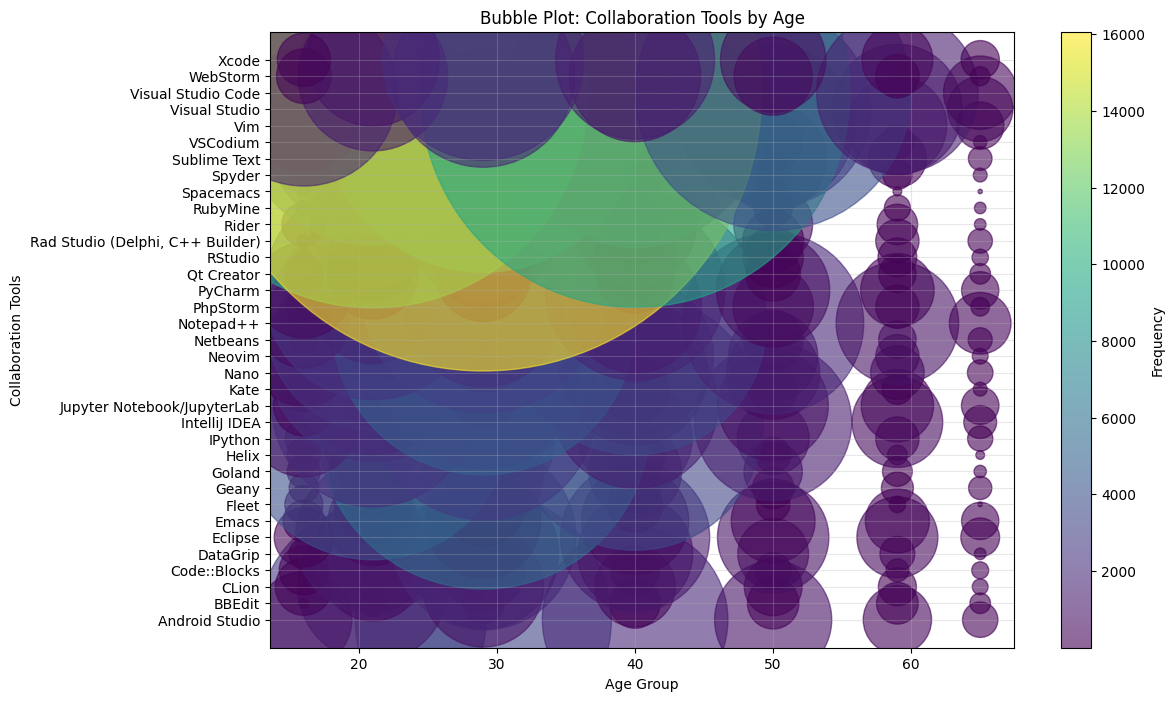

In [22]:
query = """
    SELECT NEWCollabToolsHaveWorkedWith, Age
    FROM main
    WHERE NEWCollabToolsHaveWorkedWith IS NOT NULL AND Age IS NOT NULL
"""
tools_data = pd.read_sql_query(query, conn)
# Expand tools into separate rows and count usage by age
tools_data_expanded = tools_data.assign(Tool=tools_data['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('Tool')
tools_counts = tools_data_expanded.groupby(['Tool', 'Age']).size().reset_index(name='Frequency')
tools_counts['AgeNumeric'] = tools_counts['Age'].map(age_mapping)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    tools_counts['AgeNumeric'], 
    tools_counts['Tool'], 
    s=tools_counts['Frequency'] * 10, 
    alpha=0.6, 
    c=tools_counts['Frequency'], 
    cmap='viridis'
)
plt.colorbar(scatter, label='Frequency')
plt.xlabel('Age Group')
plt.ylabel('Collaboration Tools')
plt.title('Bubble Plot: Collaboration Tools by Age')
plt.grid(alpha=0.3)
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



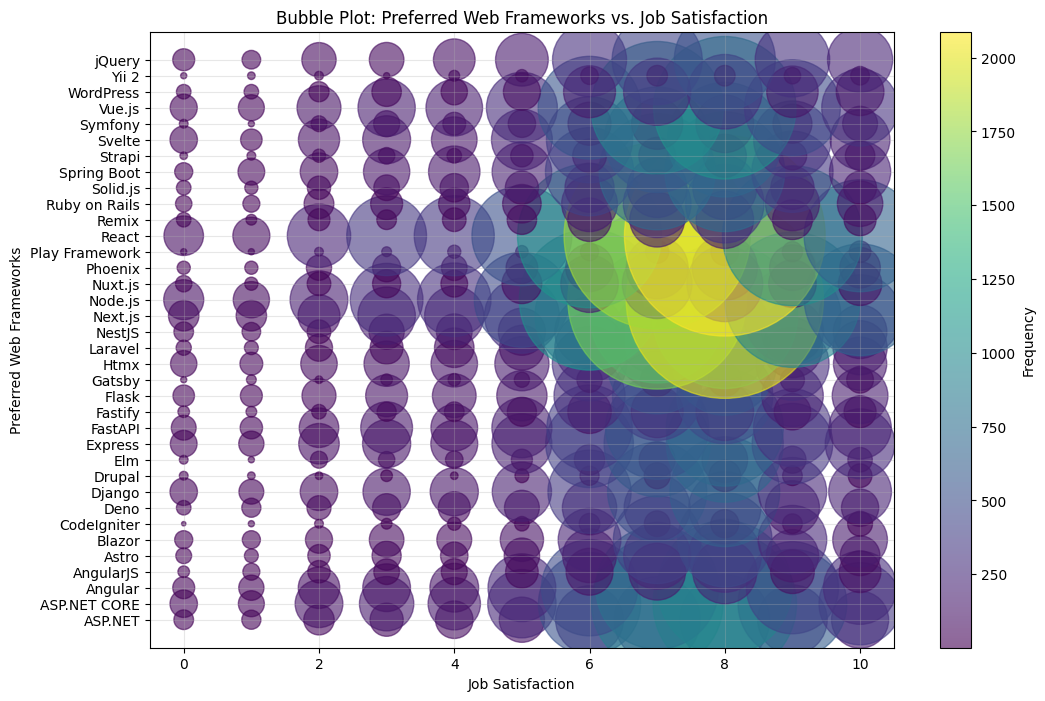

In [23]:
query = """
    SELECT WebframeWantToWorkWith, JobSat
    FROM main
    WHERE WebframeWantToWorkWith IS NOT NULL AND JobSat IS NOT NULL
"""
webframe_data = pd.read_sql_query(query, conn)
# Expand frameworks into separate rows and count occurrences
webframe_expanded = webframe_data.assign(Framework=webframe_data['WebframeWantToWorkWith'].str.split(';')).explode('Framework')
webframe_counts = webframe_expanded.groupby(['Framework', 'JobSat']).size().reset_index(name='Frequency')
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    webframe_counts['JobSat'], 
    webframe_counts['Framework'], 
    s=webframe_counts['Frequency'] * 10, 
    alpha=0.6, 
    c=webframe_counts['Frequency'], 
    cmap='viridis'
)
plt.colorbar(scatter, label='Frequency')
plt.xlabel('Job Satisfaction')
plt.ylabel('Preferred Web Frameworks')
plt.title('Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction')
plt.grid(alpha=0.3)
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



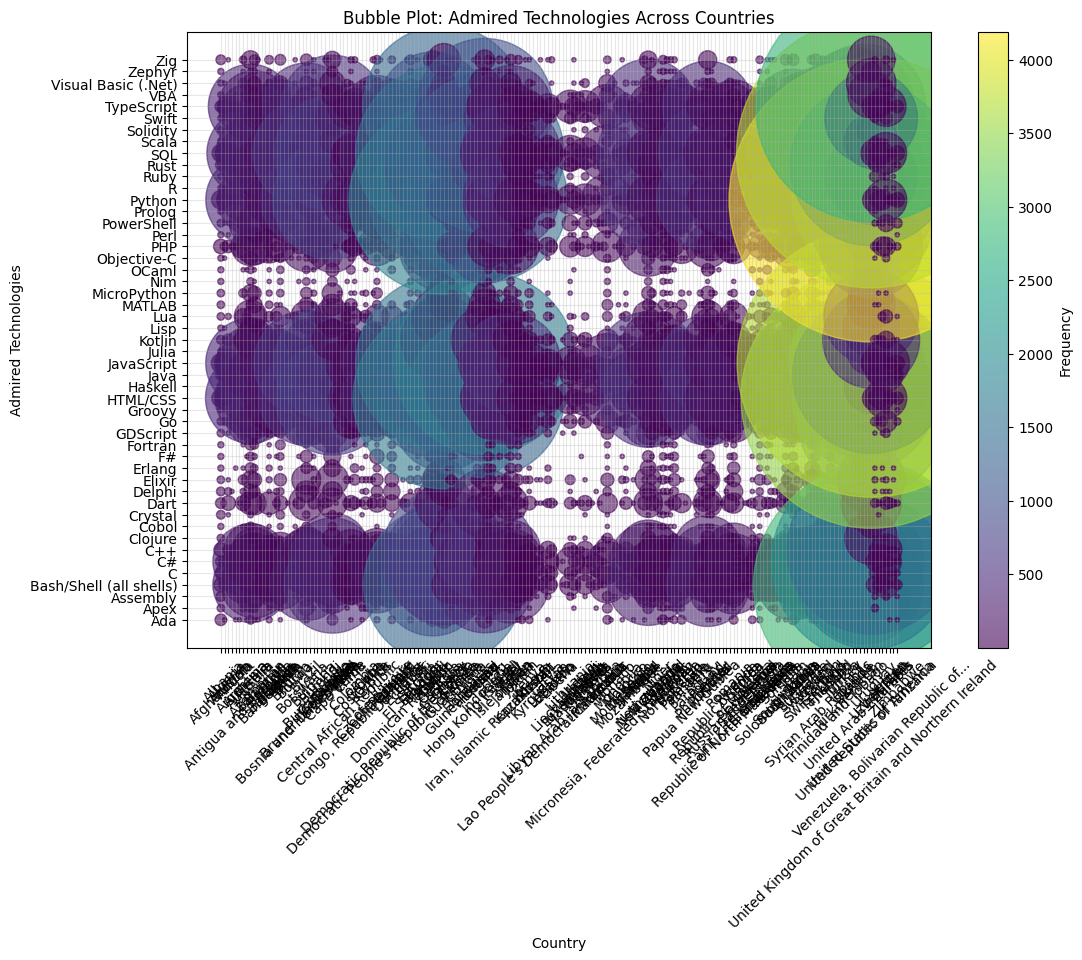

In [24]:
query = """
    SELECT LanguageAdmired, Country
    FROM main
    WHERE LanguageAdmired IS NOT NULL AND Country IS NOT NULL
"""
country_data = pd.read_sql_query(query, conn)
# Expand admired technologies into separate rows
country_expanded = country_data.assign(Technology=country_data['LanguageAdmired'].str.split(';')).explode('Technology')

# Group by Country and Technology to calculate counts
country_counts = country_expanded.groupby(['Country', 'Technology']).size().reset_index(name='Frequency')
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    country_counts['Country'], 
    country_counts['Technology'], 
    s=country_counts['Frequency'] * 10, 
    alpha=0.6, 
    c=country_counts['Frequency'], 
    cmap='viridis'
)
plt.colorbar(scatter, label='Frequency')
plt.xlabel('Country')
plt.ylabel('Admired Technologies')
plt.title('Bubble Plot: Admired Technologies Across Countries')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
